In [10]:
import pandas as pd
df = pd.read_csv('dump_cat.csv')


In [39]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
#df = df[pd.notnull(df['Consumer complaint narrative'])]
df.head()

,Unnamed: 0,Short_description,Category
0,0,'phx-vapp-770.chw.edu':CPU Utilization is '96'...,Server
1,1,nmscust02-1 : CHW-as1-k21-main-edc { Ethernet...,Network
2,2,'chw-viis-512.chw.edu':CPU Utilization is '97'...,Server
3,3,nmscust02-3 : CHW-as1-idf2-infusion-agch : 10....,Network
4,4,Exchange Mailbox task not running,Server


In [11]:
df.shape

(98223, 3)

In [12]:

df=df.drop(columns=['Unnamed: 0'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98223 entries, 0 to 98222
Data columns (total 2 columns):
Short_description    98222 non-null object
Category             98223 non-null object
dtypes: object(2)
memory usage: 1.5+ MB


In [15]:
#get data with at leaset count(assignment group)>200
df1 = df.drop_duplicates()
print(df1.shape)


(97655, 2)


In [21]:
df1_1 = df1[df1.Category.isin(['Application','End User Services','Security']) ]
print(df1_1.shape)


(67867, 2)


In [22]:
df1_2 = df1_1.sample(frac=0.5).reset_index(drop=True)
print(df1_2.shape)

(33934, 2)


In [23]:
df1_3 = df1[~df1.Category.isin(['Application','End User Services','Security']) ]
print(df1_3.shape)


(29788, 2)


In [20]:
print(df1_2.shape)

(24729, 2)


In [24]:
df2= pd.concat([df1_2,df1_3])
print(df2.shape)


(63722, 2)


In [27]:
df2.Category.value_counts()

End User Services    12351
Application          11695
Security              9888
Server                9559
Network               7041
HelpDesk              6529
EAI Interface         2199
Telecom               2140
Human Resources        948
Storage                775
EAI Component          597
Name: Category, dtype: int64

In [28]:
df=df2

In [ ]:
df3 = df2.sample(frac=0.5).reset_index(drop=True)
print(df3.shape)

In [6]:
df.to_csv('dump_cat2.csv',index=False)

In [6]:
df=df.sample(frac=0.5).reset_index(drop=True)

In [29]:
df['category_id'] = df['Category'].factorize()[0]
from io import StringIO
category_id_df = df[['Category','category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[[ 'category_id','Category']].values)

In [30]:
df.head()

,Short_description,Category,category_id
0,Run DBAN on the following pcs(see details),End User Services,0
1,keyboard is sticky and keys are sticking Room ...,End User Services,0
2,Desktop//freezed after restart//Devid sjheonc0...,End User Services,0
3,Cerner Firstnet-- need patient to be removed,Application,1
4,Label printer issue-SJRXADT16,End User Services,0


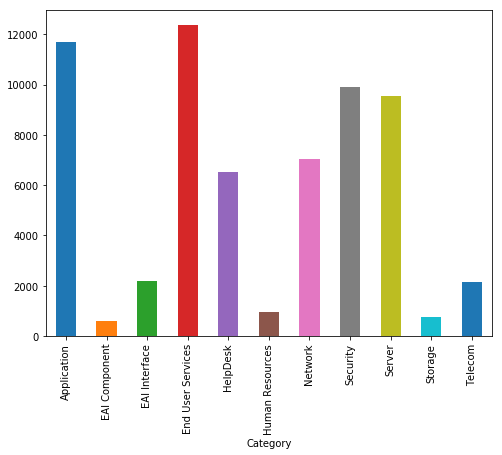

In [31]:

fig = plt.figure(figsize=(8,6))
df.groupby('Category').Short_description.count().plot.bar(ylim=0)
plt.show()

In [33]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop = stopwords.words('english')
lemmer=WordNetLemmatizer()
#remove special chars
pat = r'[_]+'
df.Short_description = df.Short_description.str.replace(pat, '',regex=True)
pat = r'[^A-Za-z0-9 ]+'
df.Short_description = df.Short_description.str.replace(pat, '',regex=True)
df.Short_description = df.Short_description.apply(lambda x: ' '.join([lemmer.lemmatize(word) for word in str(x).split()]))
df.Short_description = df.Short_description.apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stop)]))

df.Short_description = df.Short_description.apply(lambda x: ' '.join([word for word in str(x).split() if word.isalpha() ]))

In [32]:
df.shape

(63722, 3)

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df.Short_description).toarray()
labels = df.category_id
features.shape

(63722, 8812)

In [11]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score


models = [
    #RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC()#,
    #MultinomialNB(),
    #LogisticRegression()
    #SGDClassifier(),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for imodel in models:
  model_name = imodel.__class__.__name__
  accuracies = cross_val_score(imodel, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

MemoryError: 

In [97]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
#plt.show()

cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC    0.56415
Name: accuracy, dtype: float64

In [35]:



X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)


In [36]:
print(X_train.shape, y_train.shape)

(42693, 8812) (42693,)


In [99]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)


In [100]:
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

In [101]:
X_test_sm, y_test_sm = sm.fit_sample(X_test, y_test)

In [50]:
print(X_train_sm.shape, y_train_sm.shape)

(31302, 4025) (31302,)


In [37]:
np.bincount(y_train)

array([8268, 7841, 6667, 6336, 4716, 1485,  640, 4395,  409,  496, 1440], dtype=int64)

In [136]:
#unique, counts = np.unique(y_train, return_counts=True)
#dict(zip(unique, counts))

In [65]:
np.bincount(y_test_sm)

array([428, 428, 428, 428, 428, 428, 428, 428, 428, 428, 428, 428, 428,
       428, 428, 428, 428, 428, 428, 428, 428, 428, 428, 428, 428, 428,
       428, 428, 428, 428, 428, 428, 428, 428, 428, 428, 428], dtype=int64)

In [40]:
from sklearn.svm import LinearSVC
model = LinearSVC()
model.fit(X_train, y_train)
#y_pred = model.predict(X_test)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [41]:
y_pred = model.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred)

In [103]:
y_pred_sm = model.predict(X_test_sm)

conf_mat = confusion_matrix(y_test_sm, y_pred_sm)

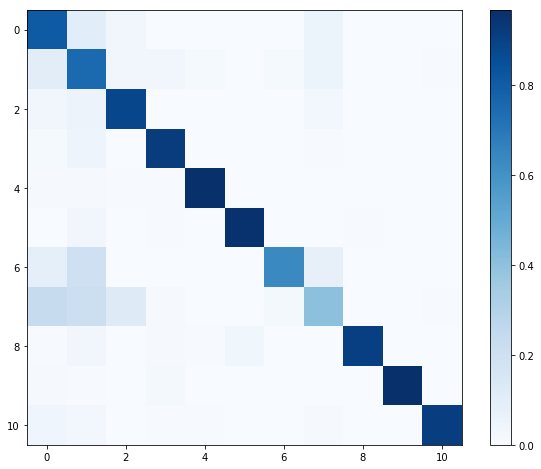

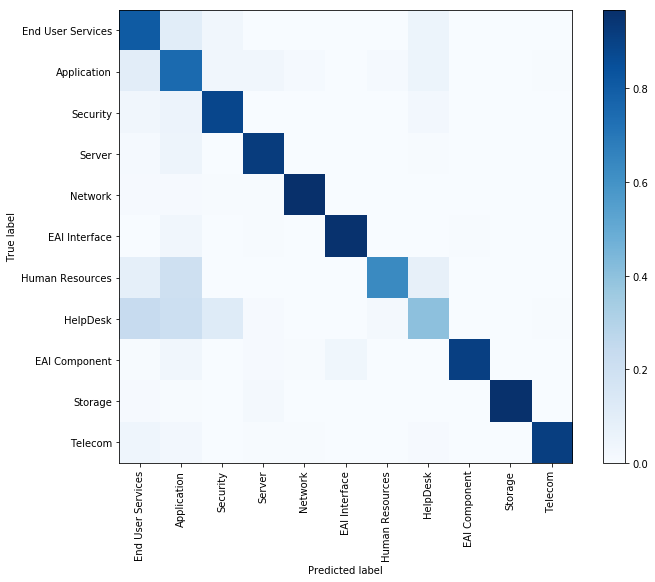

In [43]:

import itertools
cm_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
#print('Normalized confusion matrix')
#print(cm_normalized)
plt.figure()

plt.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Blues)
#plt.title(title)
plt.colorbar()
names=category_id_df.Category.values#, yticklabels=category_id_df.Assignment_group.values
#names = [ '\n'.join(wrap(l, 20)) for l in names ]
tick_marks = np.arange(len(names))
plt.xticks(tick_marks, names, rotation=90)
plt.yticks(tick_marks, names)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

#thresh = cm_normalized.max() / 1.5
#for i, j in itertools.product(range(cm_normalized.shape[0]), range(cm_normalized.shape[1])):
#        plt.text(j, i, "{:0.2f}".format(cm_normalized[i, j]),
#        horizontalalignment="center",
#        color="white" if cm_normalized[i, j] > thresh else "black")

plt.savefig('cm_cat_ml1.png', dpi=100)
plt.show()

In [33]:
model.fit(features, labels)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [45]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, 
                                    target_names=df['Category'].unique()))

                   precision    recall  f1-score   support

End User Services       0.75      0.81      0.78      4083
      Application       0.68      0.75      0.72      3854
         Security       0.85      0.88      0.86      3221
           Server       0.94      0.92      0.93      3223
          Network       0.96      0.97      0.97      2325
    EAI Interface       0.96      0.96      0.96       714
  Human Resources       0.67      0.63      0.65       308
         HelpDesk       0.61      0.40      0.49      2134
    EAI Component       0.97      0.91      0.94       188
          Storage       0.97      0.96      0.97       279
          Telecom       0.93      0.91      0.92       700

      avg / total       0.81      0.81      0.81     21029



In [109]:
model2 = XGBClassifier()
model2.fit(X_train, y_train)
# make predictions for test data
y_pred2 = model2.predict(X_test)
predictions = [round(value) for value in y_pred2]
# evaluate predictions
accuracy2 = accuracy_score(y_test2, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

NameError: name 'accuracy_score' is not defined

In [111]:
from sklearn.metrics import accuracy_score
accuracy2 = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy2 * 100.0))

Accuracy: 52.67%


In [78]:
texts = ["Monitor   How to increase the brightness",
         "Kyocera Printer Issue  Kyocera Printer Issue",
         "Emergency Account Disablement  user ID   Need to be disabled Immediately",
         "Network account lock username  ",
         "printer  patient data not printing up from cerner ",
         "network account   password reset  user name  HDUV  done ",
         "Helpdesk - Clinical Application Issue",
        "Cerner  Access Level is incorrectly provisioned   "]
text_features = tfidf.transform(texts)
predictions = model.predict(text_features)
for text, predicted in zip(texts, predictions):
  print('"{}"'.format(text))
  print("  - Predicted as: '{}'".format(id_to_category[predicted]))
  print("")

"Monitor   How to increase the brightness"
  - Predicted as: 'DH-SW-EUS Phoenix'

"Kyocera Printer Issue  Kyocera Printer Issue"
  - Predicted as: 'DH-MPS Kyocera'

"Emergency Account Disablement  user ID   Need to be disabled Immediately"
  - Predicted as: 'DHE-SecAdmin'

"Network account lock username  "
  - Predicted as: 'DH-Enterprise IT Service Cntr'

"printer  patient data not printing up from cerner "
  - Predicted as: 'DH-ClinApps NAS'

"network account   password reset  user name  HDUV  done "
  - Predicted as: 'DH-Enterprise IT Service Cntr'

"Helpdesk - Clinical Application Issue"
  - Predicted as: 'DH-ClinApps CPOE'

"Cerner  Access Level is incorrectly provisioned   "
  - Predicted as: 'DHE-SecAdmin'



In [54]:
texts = ["Monitor   How to increase the brightness",
         "Kyocera Printer Issue  Kyocera Printer Issue",
         "Emergency Account Disablement  user ID   Need to be disabled Immediately",
         "Network account lock username  ",
         "printer  patient data not printing up from cerner ",
         "network account   password reset  user name  HDUV  done "]
text_features = tfidf.transform(texts)
predictions = model.predict(text_features)
for text, predicted in zip(texts, predictions):
  print('"{}"'.format(text))
  print("  - Predicted as: '{}'".format(id_to_category[predicted]))
  print("")

"Monitor   How to increase the brightness"
  - Predicted as: 'DH-SC-EUS StJohnRMC'

"Kyocera Printer Issue  Kyocera Printer Issue"
  - Predicted as: 'DH-MPS Kyocera'

"Emergency Account Disablement  user ID   Need to be disabled Immediately"
  - Predicted as: 'DHE-SecAdmin'

"Network account lock username  "
  - Predicted as: 'DH-Enterprise IT Service Cntr'

"printer  patient data not printing up from cerner "
  - Predicted as: 'DH-ClinApps NAS'

"network account   password reset  user name  HDUV  done "
  - Predicted as: 'DH-Enterprise IT Service Cntr'



In [33]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, 
                                    target_names=df['Assignment_group'].unique()))

                                   precision    recall  f1-score   support

    DH-Enterprise IT Service Cntr       0.87      0.97      0.92      8256
               DH-NC-EUS Stockton       0.32      0.25      0.28       149
                DH-SW-EUS Gilbert       0.32      0.36      0.34        85
         DHE-RCM-AppOpSupport-MS4       0.68      0.51      0.59       127
                  DH-ClinApps HIM       0.37      0.26      0.30        54
                  DH-Helpdesk RRE       0.25      0.15      0.18       255
     DH-SC-EUS SLA CalifornHospMC       0.35      0.29      0.31        98
                DH-NC-EUS Sac MGH       0.47      0.35      0.40       104
                DH-NC-EUS Sac MET       0.62      0.47      0.54       128
                  DH-ClinApps NAS       0.62      0.63      0.63       252
              DH-SC-EUS StJohnRMC       0.31      0.25      0.28       155
             DH-ClinApps Pharmacy       0.62      0.61      0.62        92
DHE-HR Tier 2 - Talent M

In [ ]:
from IPython.display import display

for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 6:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Assignment_group', 'Short_description']])
      print('')

In [11]:
from sklearn.feature_selection import chi2
import numpy as np

N = 2
for Assignment_group, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Assignment_group))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))

# 'DH-ClinApps CPOE':
  . Most correlated unigrams:
       . ipet
       . physician
  . Most correlated bigrams:
       . physician issue
       . cerner physician
# 'DH-ClinApps HIM':
  . Most correlated unigrams:
       . deficiency
       . kofax
  . Most correlated bigrams:
       . report request
       . deficiency analysis
# 'DH-ClinApps Lab':
  . Most correlated unigrams:
       . lab
       . pathnet
  . Most correlated bigrams:
       . cerner pathnet
       . cerner lab
# 'DH-ClinApps NAS':
  . Most correlated unigrams:
       . shell
       . patient
  . Most correlated bigrams:
       . horizon homecare
       . tracking shell
# 'DH-ClinApps Pharmacy':
  . Most correlated unigrams:
       . medication
       . sr
  . Most correlated bigrams:
       . iv infusion
       . cerner pharmnet
# 'DH-Enterprise IT Service Cntr':
  . Most correlated unigrams:
       . login
       . account
  . Most correlated bigrams:
       . unable login
       . network account
# 'DH-GB-EUS Do

In [53]:
from sklearn.feature_selection import chi2

N = 2
for Product, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(Product))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  #print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'DH-ClinApps CPOE':
  . Top unigrams:
       . mptl
       . ipet
  . Top bigrams:
       . task list
       . dynamic documentation
# 'DH-ClinApps NAS':
  . Top unigrams:
       . homecare
       . patient
  . Top bigrams:
       . information crossing
       . careaware connect
# 'DH-Enterprise IT Service Cntr':
  . Top unigrams:
       . resolved
       . guided
  . Top bigrams:
       . issue resolved
       . needs reset
# 'DH-GB-EUS Dominican':
  . Top unigrams:
       . dominican
       . dscdadt16
  . Top bigrams:
       . loc dominican
       . scanner error
# 'DH-Helpdesk RRE':
  . Top unigrams:
       . installation
       . rre
  . Top bigrams:
       . installed username
       . need install
# 'DH-MPS Kyocera':
  . Top unigrams:
       . kyocera
       . paper
  . Top bigrams:
       . kyocera unable
       . kyocera working
# 'DH-NC-EUS Redding':
  . Top unigrams:
       . mmcr
       . meds
  . Top bigrams:
       . error windows
       . 10 11
# 'DH-NC-EUS Sac MET':


In [74]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))  

             precision    recall  f1-score   support

          0       0.22      0.21      0.21       146
          1       0.57      0.74      0.64       118
          2       0.45      0.42      0.43       265
          3       0.52      0.56      0.54       117
          4       0.73      0.61      0.66       264
          5       0.31      0.28      0.29       145
          6       0.96      0.95      0.96       342
          7       0.31      0.33      0.32       129
          8       0.37      0.28      0.32       283
          9       0.49      0.53      0.51       173
         10       0.53      0.70      0.60       105
         11       0.61      0.47      0.53       209
         12       0.31      0.41      0.35       147
         13       0.32      0.42      0.36       118
         14       0.23      0.35      0.28       133
         15       0.35      0.33      0.34       183
         16       0.83      0.83      0.83       227
         17       0.78      0.70      0.74   